<a href="https://colab.research.google.com/github/gn0262487838/DL_note/blob/master/Mnist_by_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model


In [0]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)

In [37]:
model = Sequential()
model.add(
    LSTM(units=50, unroll=True, input_shape=(28, 28))
)
model.add(
    Dense(units=10)
)
model.add(
    Activation("softmax")
)
model.compile(
    optimizer = Adam(),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 50)                15800     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 16,310
Trainable params: 16,310
Non-trainable params: 0
_________________________________________________________________


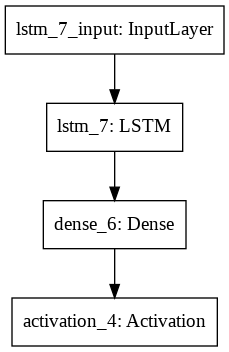

In [38]:
plot_model(model)

In [39]:
BATCH_SIZE = 50
BATCH_START = 0
for step in range(1, 1201):
    # data shape = (batch, timestep, input_dim)
    x_train[BATCH_START:BATCH_START + BATCJ_SIZE,:,:]
    y_train[BATCH_START:BATCH_START + BATCJ_SIZE,:]

    lost = model.train_on_batch(x_train, y_train)
    BATCH_START += BATCH_SIZE
    BATCH_START = 0 if BATCH_START >= x_train.shape[0] else BATCH_START
    
    if step % 600 == 0:
        loss, acc = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
        if acc > 0.95:
            break


10000/10000 [==============================] - 7s 688us/sample - loss: 0.0974 - acc: 0.9730


In [40]:
test_set = x_test[:10,:,:]
pred = model.predict_classes(test_set)
print("預測:", pred.tolist())
print("實際:", [ i.argmax() for i in y_test[:10,:]])

預測: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
實際: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


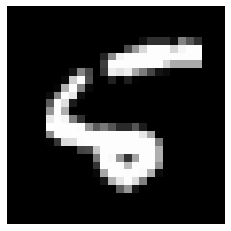

In [41]:
import matplotlib.pyplot as plt
plt.imshow(x_test[8], cmap="gray")
plt.axis("off")
plt.show()